## Data Analysis

In [1]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

import numpy as np 

GetDist Version: 1.1.3, Matplotlib version: 3.3.4


In [2]:
names_planck  = ['omega_cdm', 'S_8', 'omega_b', 'n_s', 'h', 'Omega_m', 'sigma8']
labels_planck = [r'\omega_{\rm{cdm}}', r'S_{\rm{8}}', r'\omega_{\rm{b}}', r'n_{\rm{s}}',
              'h', r'\Omega_{\rm{m}}', r'\sigma_{\rm{8}}']

names_k1k  = ['omega_cdm', 'S_8', 'omega_b', 'n_s', 'h', 'Omega_m', 'sigma8'] 
labels_k1k = [r'\omega_{\rm{cdm}}', r'S_{\rm{8}}', r'\omega_{\rm{b}}', r'n_{\rm{s}}',
              'h', r'\Omega_{\rm{m}}', r'\sigma_{\rm{8}}'] 

names_comp = ['S8_geo', 'Omega_m_geo', 'sigma8_geo', 'S8_gro', 'Omega_m_gro', 'sigma8_gro']
labels_comp = [r'S_{\rm{8}}^{\rm{geom}}',  r'\Omega_{\rm{m}}^{\rm{geom}}', r'\sigma_{\rm{8}}^{\rm{geom}}',
               r'S_{\rm{8}}^{\rm{grow}}',  r'\Omega_{\rm{m}}^{\rm{grow}}', r'\sigma_{\rm{8}}^{\rm{grow}}']

ranges_k1k = {'omega_cdm':[0.051, 0.255], 'S_8':[0.1, 1.3], 'omega_b':[0.019, 0.026],
              'n_s':[0.84, 1.1], 'h':[0.64, 0.82]}

In [3]:
path_chains = '/home/jaimerz/Master/montepython_2cosmos_public/chains/'

In [4]:
planck1 = np.loadtxt(path_chains+'Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt(path_chains+'Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt(path_chains+'Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt(path_chains+'Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)



In [5]:
planck_params = []
for item in planck_tot:
    planck_params.append([item[3], item[35], item[2],  item[7], item[29]/100, item[31], item[34]])
planck_params = np.array(planck_params)
planck= MCSamples(samples=planck_params, names = names_planck, labels = labels_planck, label= r'$Planck$ 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


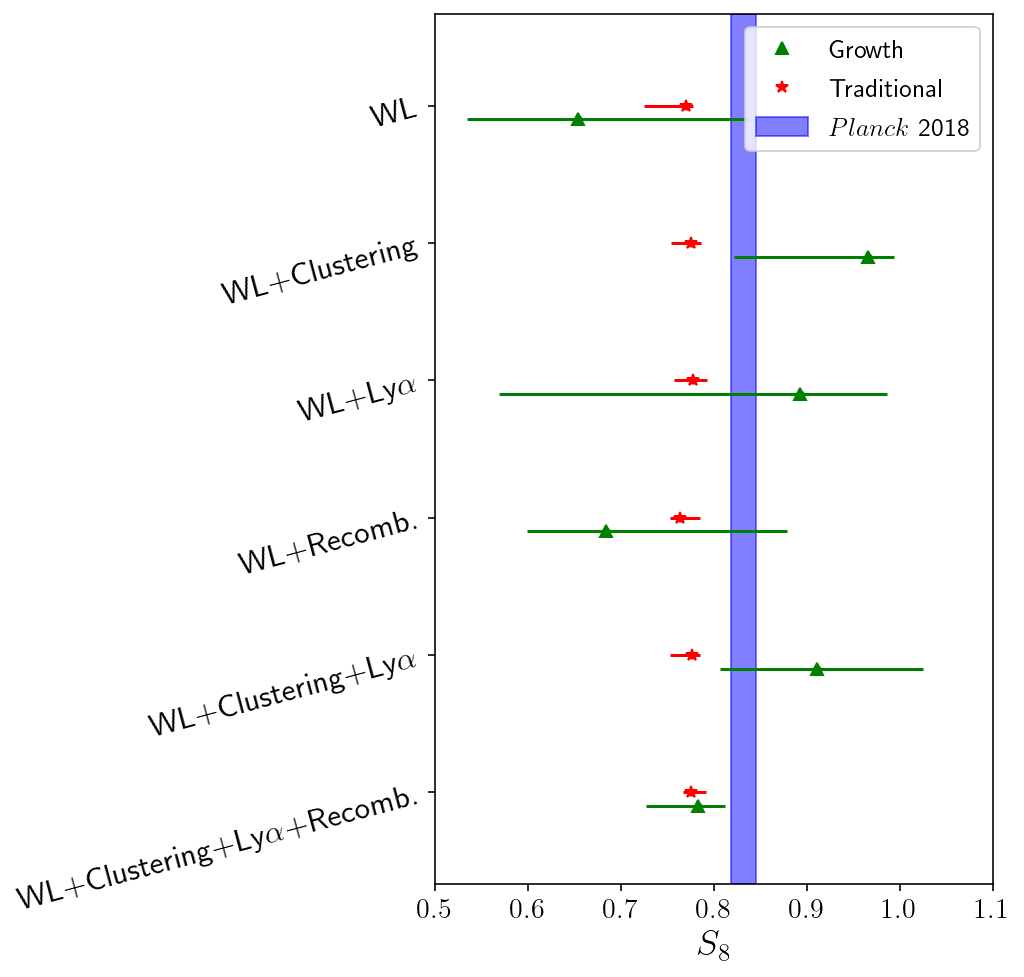

In [6]:
y = [0,3,6,9,12,15]
y_1 = [0.3, 3.3 ,6.3 ,9.3, 12.3, 15.3 ]
#y_2 = [-0.3, 2.7 ,5.7 ,8.7, 11.7, 14.7 ]
my_yticks = ['WL', 'WL+Clustering', r'WL+Ly$\alpha$', r'WL+Recomb.', 
             r'WL+Clustering+Ly$\alpha$', r'WL+Clustering+Ly$\alpha$+Recomb.']

S8 = [0.7702132, 0.7761267,  0.7779783, 0.7642852, 0.7765731, 0.7755883]
S8_err = [[0.7248134774610477, 0.7777705072455087], [0.7539940644046176, 0.7859778489000613],
          [0.7574672739901569, 0.7928188268673858], [0.7529480265968269, 0.7851011265759915],
          [0.7534095043786152, 0.7857879969482283], [0.7673325619943326, 0.7914235919454251]]

S8_gro = [0.6544201, 0.9664795, 0.8933472,  0.6840435, 0.9110773, 0.7832451]
S8_gro_err = [[0.5344430396638886, 0.8370487589639941], [0.8217310495407485, 0.9936335252910454],
              [0.5689035327000396, 0.9860877478156941], [0.5995004815391675, 0.878618148104084],
              [0.8063495307861008, 1.0248314685719178], [0.7271242789219665, 0.8126198999255005]]


for counter, entry in enumerate(S8_err):
    entry[0] = S8[counter]-entry[0]
    entry[1] = -S8[counter]+entry[1]

for counter, entry in enumerate(S8_gro_err):
    entry[0] = S8_gro[counter]-entry[0]
    entry[1] = -S8_gro[counter]+entry[1]
    
#for counter, entry in enumerate(S8_geo_err):
#    entry[0] = S8_geo[counter]-entry[0]
#    entry[1] = -S8_geo[counter]+entry[1]

    
plt.figure(figsize=(5,8))
    

plt.xlabel(r'$S_{\rm{8}}$', fontsize=18)

plt.errorbar( S8, y, xerr=np.transpose(S8_err), fmt='r.')
#plt.errorbar(S8_geo, y_1,   xerr=np.transpose(S8_geo_err), fmt='k.')
plt.errorbar( S8_gro, y_1,  xerr=np.transpose(S8_gro_err), fmt='g.')

#plt.plot( S8_geo, y_1, 'k^', label='Geometry')
plt.plot( S8_gro, y_1, 'g^', label='Growth')
plt.plot( S8, y, 'r*', label='Traditional')

plt.axvspan(0.832 - 0.013, 0.832 + 0.013, alpha = 0.5, color='b',  label= r'$Planck$ 2018')

plt.legend(loc = 1, prop={'size': 13})

plt.axis([0.5, 1.1,  17,-2,])


plt.yticks(y, my_yticks, fontsize=16)
plt.yticks(rotation=15)

plt.xticks(fontsize=14)


plt.show()

In [43]:
def get_DIC(file):
    chain = np.loadtxt(path_chains+file+'/chain_NS__accepted.txt')
    loglkl = np.transpose(chain)[1]
    m = np.mean(-2*loglkl)
    s = 0.5*np.var(-2*loglkl)
    return m+s

In [32]:
def get_bayes_factor(file_1c, file_2c):
    chain_1c = np.loadtxt(path_chains+file_1c+'/chain_NS__accepted.txt')
    chain_2c = np.loadtxt(path_chains+file_2c+'/chain_NS__accepted.txt')
    lkl_1c = np.exp(np.transpose(chain_1c)[1])
    #print(lkl_1c)
    lkl_2c = np.exp(np.transpose(chain_2c)[1])
    X_1c = np.sort(np.random.rand(len(lkl_1c)+1))[::-1]
    X_1c[0] = 1
    #print(X_1c)
    DX_1c = 0.5*(X_1c[1:]-X_1c[:-1])
    X_2c = np.sort(np.random.rand(len(lkl_2c)+1))[::-1]
    X_2c[0] = 1
    DX_2c = 0.5*(X_2c[1:]-X_2c[:-1])
    Z_1c = np.sum(lkl_1c*DX_1c)
    Z_2c = np.sum(lkl_2c*DX_2c)
    return Z_1c/Z_2c

In [21]:
def munch_1cosmo_appendix(file, names, labels, name):
    chain = np.loadtxt(path_chains+file+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = cols[2:9]
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=names, labels=labels, label = name,
                        weights=weights, loglikes=loglikes, ranges=ranges_k1k)
    return samples

In [22]:
def munch_1cosmo(file, names, labels, name):
    chain = np.loadtxt(path_chains+file+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.append(cols[2:7], cols[-2:], axis=0)
    #param_cols = np.append(param_cols, [cols[8]], axis=0)
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=names, labels=labels, label = name,
                        weights=weights, loglikes=loglikes, ranges=ranges_k1k)
    return samples

In [23]:
def munch_2cosmo(file, names, labels, name):
    chain = np.loadtxt(path_chains+file+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights =  cols[0]
    param_cols_gro = np.append(cols[2:7], cols[-4:-2], axis=0)
    #param_cols_gro = np.append(param_cols_gro, [cols[13]], axis=0)
    param_rows_gro = np.transpose(param_cols_gro)
    param_cols_geo = np.append(cols[7:12], cols[-2:], axis=0)
    #param_cols_geo = np.append(param_cols_geo, [cols[13]], axis=0)
    param_rows_geo = np.transpose(param_cols_geo)
        
    samples_gro = MCSamples(samples=param_rows_gro, names=names, labels=labels, label=name+' grow.', 
                        weights=weights, loglikes=loglikes, ranges=ranges_k1k)
    samples_geo = MCSamples(samples=param_rows_geo, names=names, labels=labels, label=name+' geom.',
                        weights=weights, loglikes=loglikes, ranges=ranges_k1k)
    
    return samples_gro, samples_geo
    

In [24]:
def munch_comp(file, names, labels, name):
    chain = np.loadtxt(path_chains+file+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights =  cols[0]
    param_cols_gro = np.append([cols[3]], cols[-4:-2], axis=0)
    param_cols_geo = np.append([cols[8]], cols[-2:], axis=0)
    comp_cols = np.append(param_cols_geo, param_cols_gro, axis=0)
    comp_rows = np.transpose(comp_cols)
        
    samples = MCSamples(samples=comp_rows, names=names, labels=labels, label=name+' grow.', 
                        weights=weights, loglikes=loglikes)
    return samples
    

In [25]:
BOSS = munch_1cosmo_appendix('Cl', names_planck, labels_planck, 'Clustering')
Lya = munch_1cosmo_appendix('Ly', names_planck, labels_planck, r'Ly$\alpha$')
CMB = munch_1cosmo_appendix('CMB', names_planck, labels_planck, 'Recomb.')

Removed no burn in
Removed no burn in
Removed no burn in


In [26]:
K1K = munch_1cosmo('K1K_1c', names_k1k, labels_k1k, 'WL')
K1K_Cl = munch_1cosmo('K1K_Cl_1c', names_k1k, labels_k1k, 'WL+Clustering')
K1K_Ly = munch_1cosmo('K1K_Ly_1c', names_k1k, labels_k1k, r'WL+Ly$\alpha$')
K1K_CMB = munch_1cosmo('K1K_CMB_1c', names_k1k, labels_k1k, r'WL+CMB$^*$')
K1K_ClLy = munch_1cosmo('K1K_ClLy_1c', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$')
K1K_ClLyC = munch_1cosmo('K1K_ClLyC_1c', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$+Recomb.')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [27]:
K1K_gro, K1K_geo = munch_2cosmo('K1K_bp', names_k1k, labels_k1k, 'WL')
K1K_Cl_gro, K1K_Cl_geo = munch_2cosmo('K1K_Cl', names_k1k, labels_k1k, 'WL+Clustering')
K1K_Ly_gro, K1K_Ly_geo = munch_2cosmo('K1K_Ly', names_k1k, labels_k1k, r'WL+Ly$\alpha$')
K1K_CMB_gro, K1K_CMB_geo  = munch_2cosmo('K1K_CMB', names_k1k, labels_k1k, r'WL+CMB$^*$')
K1K_ClLy_gro, K1K_ClLy_geo = munch_2cosmo('K1K_ClLy', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$')
K1K_ClLyC_gro, K1K_ClLyC_geo = munch_2cosmo('K1K_ClLyC', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$+Recomb.')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [28]:
K1K_comp = munch_comp('K1K_bp', names_comp, labels_comp, 'K1K')
K1K_Cl_comp = munch_comp('K1K_Cl', names_comp, labels_comp, 'K1K+Clustering')
K1K_ClLy_comp = munch_comp('K1K_ClLy', names_comp, labels_comp, 'K1K+Clustering+Lya')
K1K_ClLyC_comp = munch_comp('K1K_ClLyC', names_comp, labels_comp, r'K1K+Clustering+Lya+CMB$*^$')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [45]:
name_pairs = [['K1K_1c', 'K1K_bp'],
         ['K1K_Cl_1c', 'K1K_Cl'],
         ['K1K_Ly_1c', 'K1K_Ly'],
         ['K1K_CMB_1c', 'K1K_CMB'],
         ['K1K_ClLy_1c', 'K1K_ClLy'],
         ['K1K_ClLyC_1c', 'K1K_ClLyC']]

print('Bayes factors')
for names in name_pairs:
    print(get_bayes_factor(names[0], names[1]))
print('DIC')
for names in name_pairs:
    print(get_DIC(names[0])/get_DIC(names[1]))

Bayes factors
0.16911513919047108
3.3020552773709912
0.7171464756683511
0.5518865330933659
1.1174639053481095
0.400943550351972
DIC
0.8553300029391345
1.1534224529743384
1.1047514392300275
1.0359180987098002
1.0467767906694907
0.9980584237590455


In [15]:
def tension(ref, values):
    p_mean = ref[0]
    p_sig = ref[1]**(2)
    means = values[0]
    sigs = values[1]**(2)
    return np.abs(p_mean-means)/np.sqrt(p_sig + sigs)

In [154]:
wms = np.array([[0.334, 0.313, 0.223, 0.284, 0.293, 0.292],
                [0.092, 0.026, 0.040, 0.008, 0.014, 0.006]])
hs = np.array([[0.729, 0.694, 0.734, 0.694, 0.681, 0.696], 
               [0.048, 0.024, 0.038, 0.014, 0.018, 0.010]])
S8s = np.array([[0.751, 0.768, 0.772, 0.768, 0.769, 0.781], 
               [0.027, 0.016, 0.017, 0.016, 0.016, 0.012]])
S81s = np.array([[0.87, 0.866 ],
               [0.076, 0.091]])
S81_ref = np.array([[0.768, 0.769 ],
               [0.016, 0.016]])
wm_ref = np.array([[0.316], 
                   [0.008]])
h_ref = np.array([[0.673],
                  [0.006]])
S8_ref = np.array([[0.834],
                   [0.016]])

In [155]:
tension(S81_ref, S81s)

array([1.31331682, 1.04983028])

# Comp plots

In [156]:
lims4 =[0.15, 0.5, 0.15, 0.5]
lims5 =[0.05, 1.45, 0.05, 1.45]
lims6 =[0.05, 1.3, 0.05, 1.3]

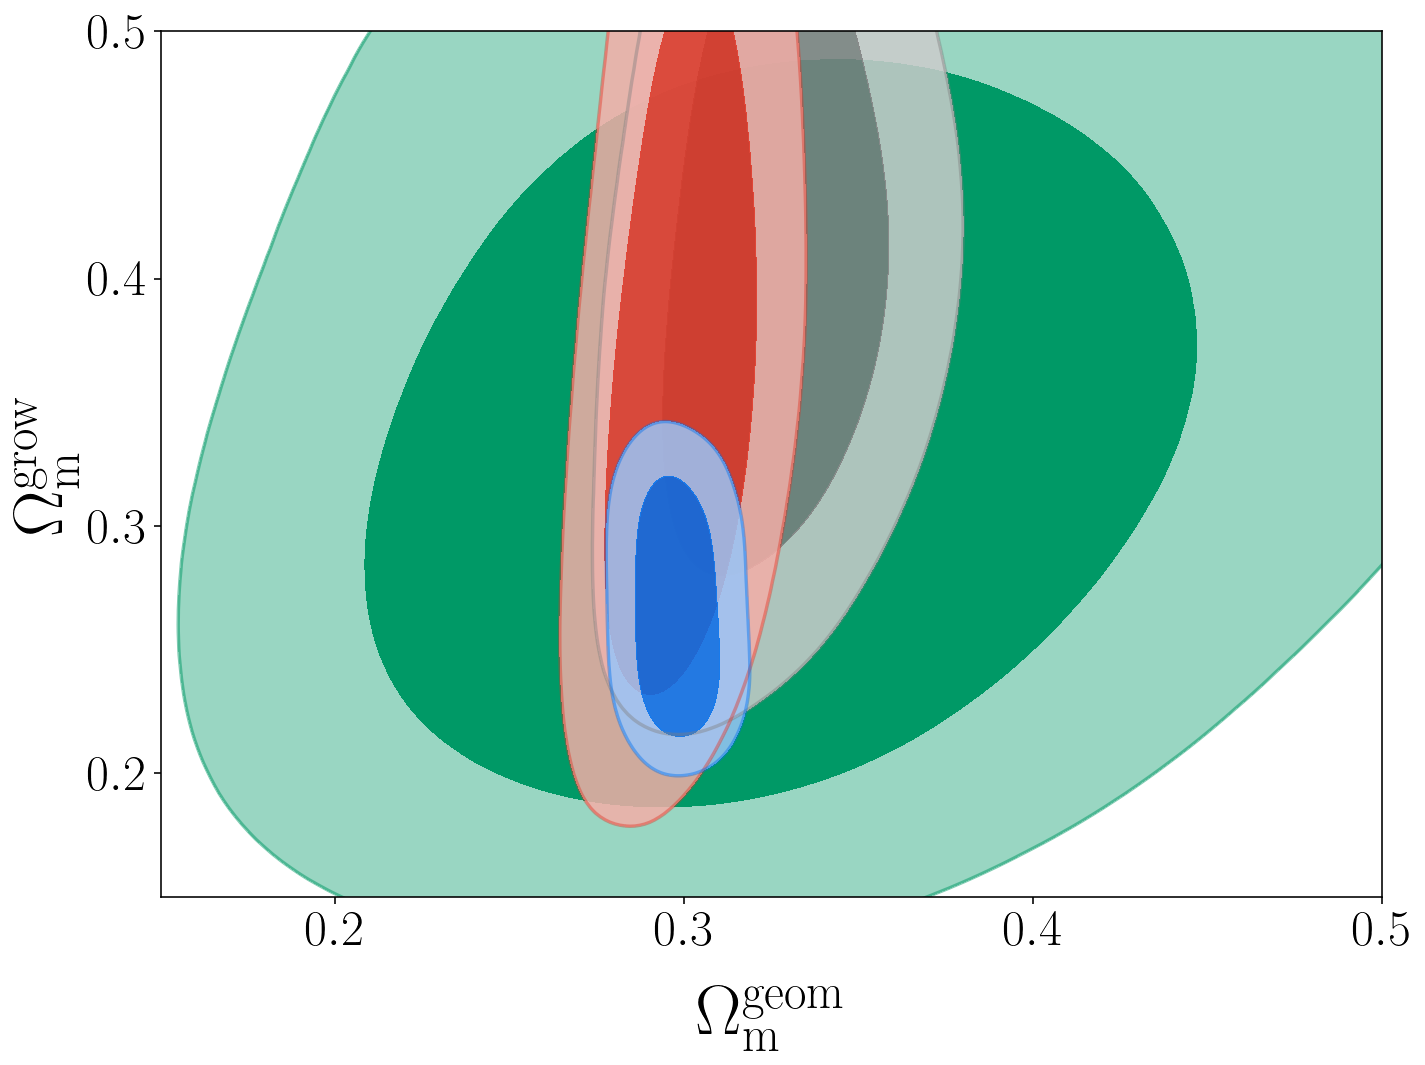

In [157]:
g = plots.get_single_plotter(width_inch=10)
g.settings.axes_fontsize=25
g.settings.axes_labelsize = 35
g.settings.legend_fontsize = 25
#g.add_legend(['WL', 'WL+Clustering', r'WL+Clustering+Ly$\alpha$', r'WL+Clustering+Ly$\alpha$+CMB'], 
#             colored_text=['green', 'black', 'red','blue'])
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'Omega_m_geo', 'Omega_m_gro', lims= lims4, filled=True);

g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/wmwm.png')

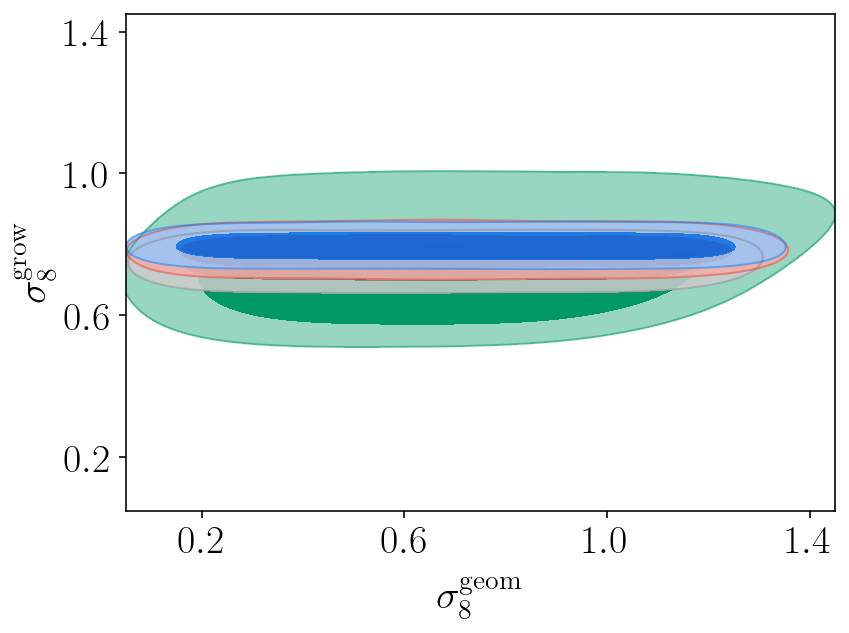

In [158]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'sigma8_geo', 'sigma8_gro', lims= lims5, filled=True);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/sigsig.png')

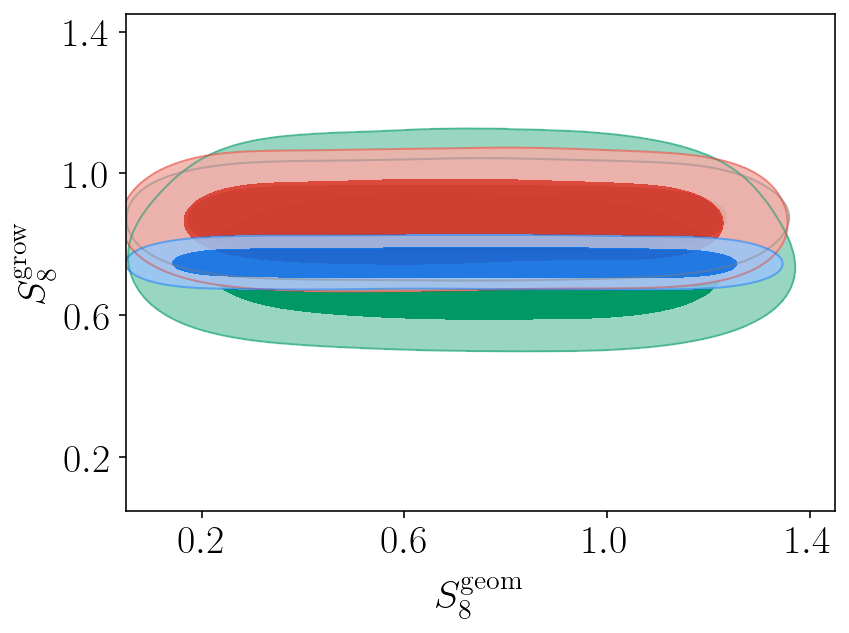

In [159]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'S8_geo', 'S8_gro', lims= lims5, filled=True);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/S8S8.png')

# 1D&2D Plots

In [172]:
lims1 = [0.15, 0.5, 0.4, 1.5]
lims2 = [0.15, 0.5, 0.65, 0.82]
lims3 = [0., 0.7]
lims4 = [0, 1.5]
lims5 = [ 0.64,   0.82]

plot = {'K1K': [K1K_gro, K1K_geo, K1K, planck],
         'K1K_Cl': [K1K_Cl_gro, K1K_Cl_geo, K1K_Cl, planck],
         'K1K_ClLy':[K1K_ClLy_gro, K1K_ClLy_geo, K1K_ClLy, planck],
         'K1K_ClLyC':  [K1K_ClLyC_gro, K1K_ClLyC_geo, K1K_ClLyC, planck]}

In [180]:
name = 'K1K_ClLyC'

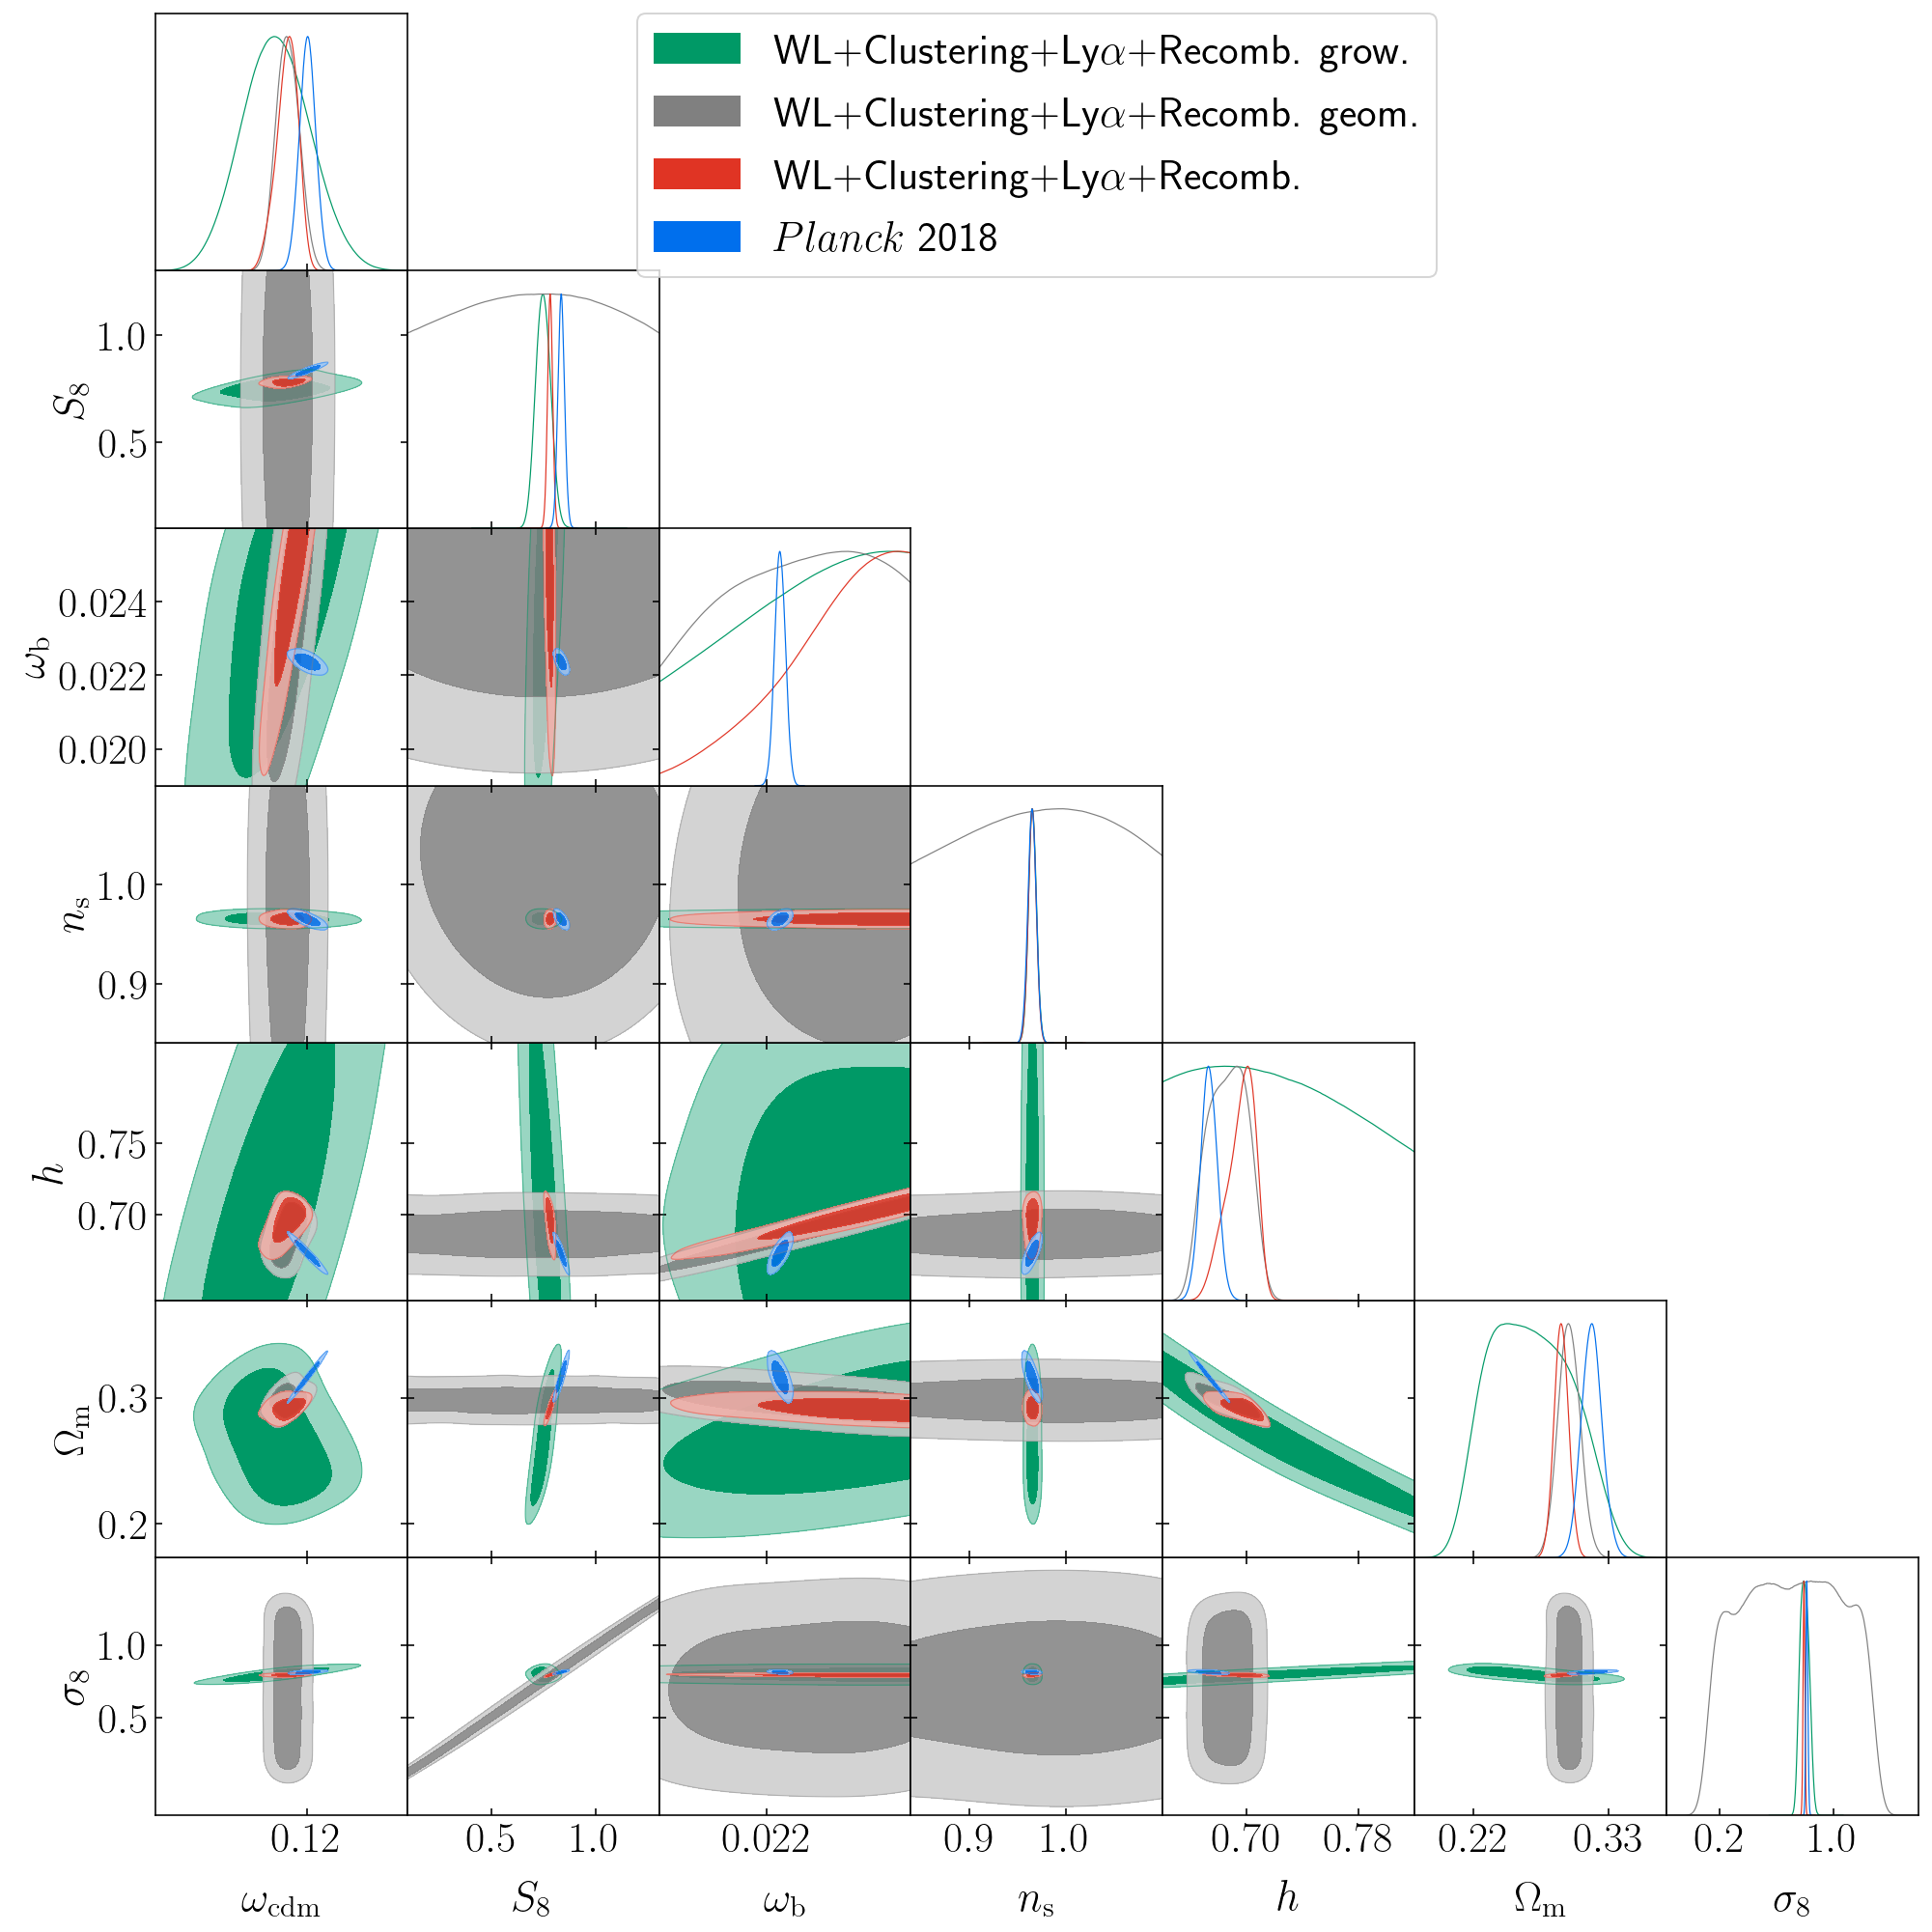

In [181]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot(plot[name], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/{}_triangle.pdf'.format(name))

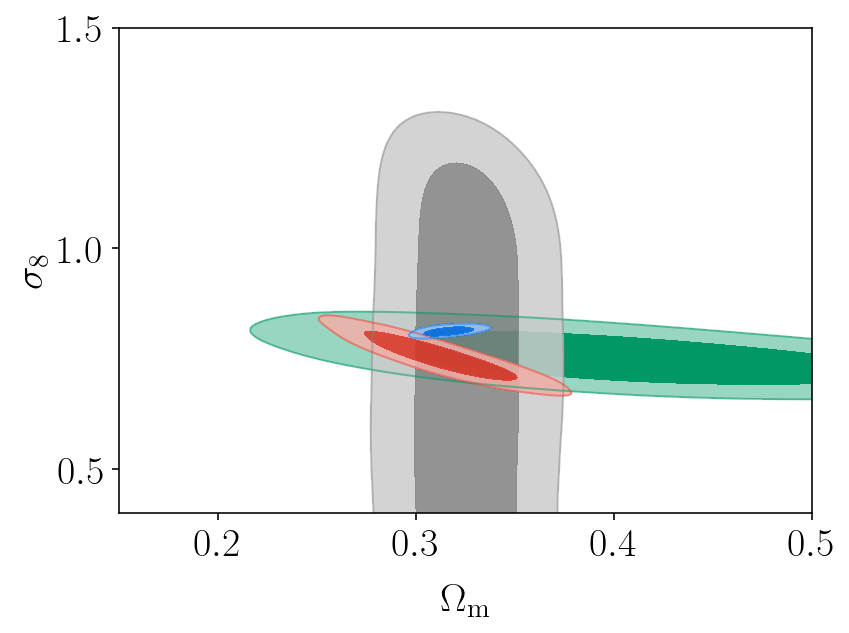

In [175]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d(plot[name], 'Omega_m', 'sigma8', filled=True, lims=lims1);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'_wmsig.png')

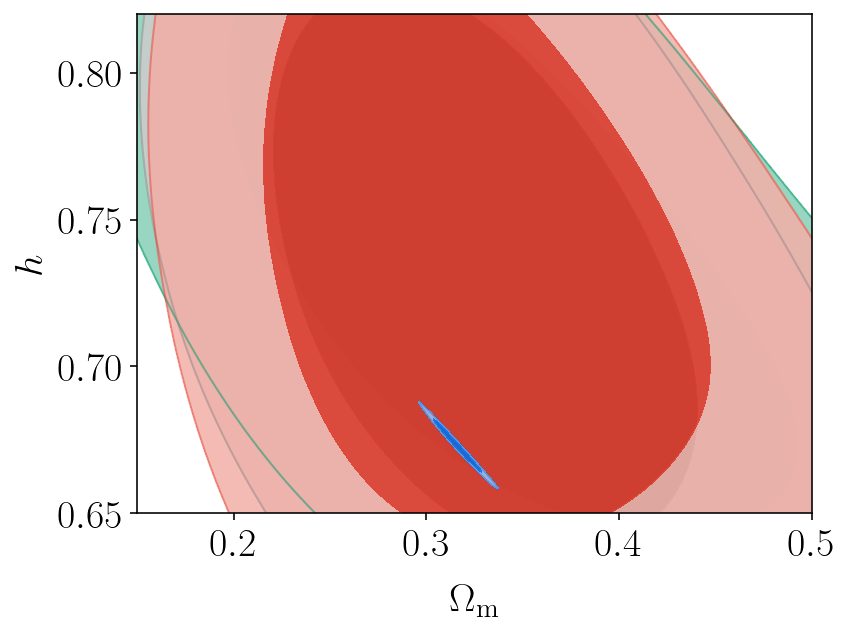

In [164]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d(plot[name],'Omega_m', 'h', filled=True, lims=lims2);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'_wmh.png')

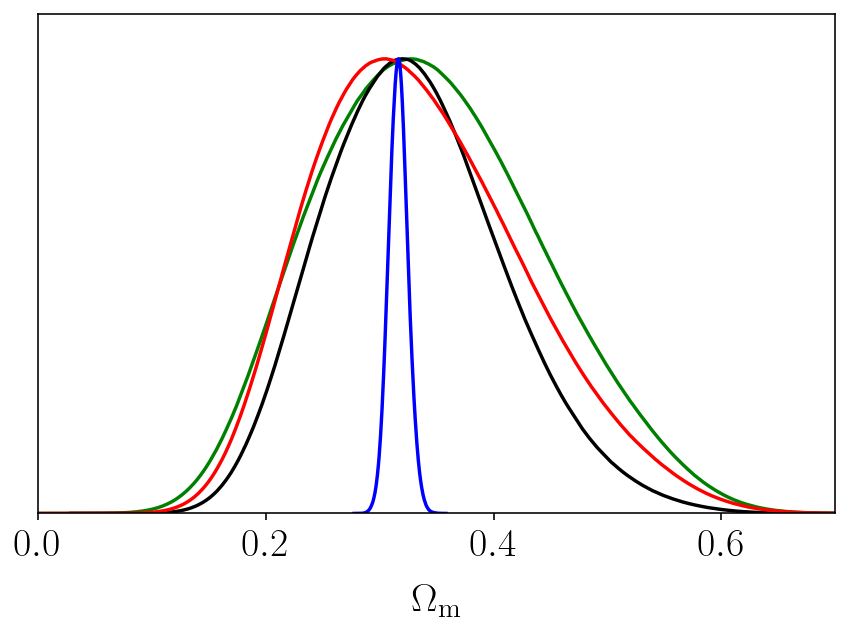

In [165]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name],'Omega_m', 
          colors=['green', 'black', 'red','blue'],
          lims=lims3);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'wm'+'.png')

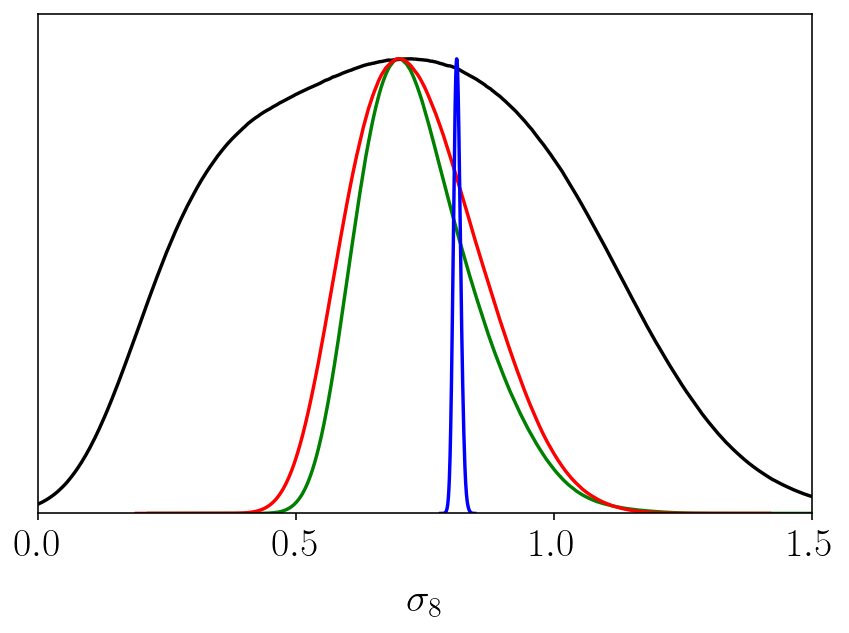

In [166]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name], 'sigma8', 
          colors=['green', 'black', 'red','blue'], 
          lims=lims4);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'sig'+'.png')

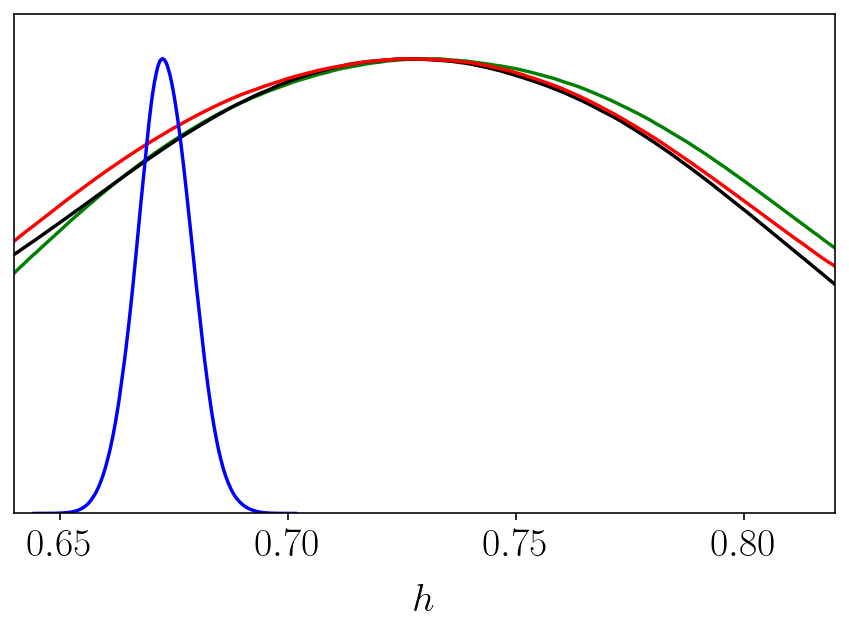

In [167]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name], 'h',
          colors=['green', 'black', 'red','blue'],
          lims=lims5);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'h'+'.png')

# Appendix plots

In [186]:
plot = {'BOSS': [BOSS, K1K, K1K_Cl, planck],
         'Lya': [Lya, K1K, K1K_Ly, planck],
         'CMB':[CMB, K1K, K1K_CMB, planck]}

name = 'Lya'

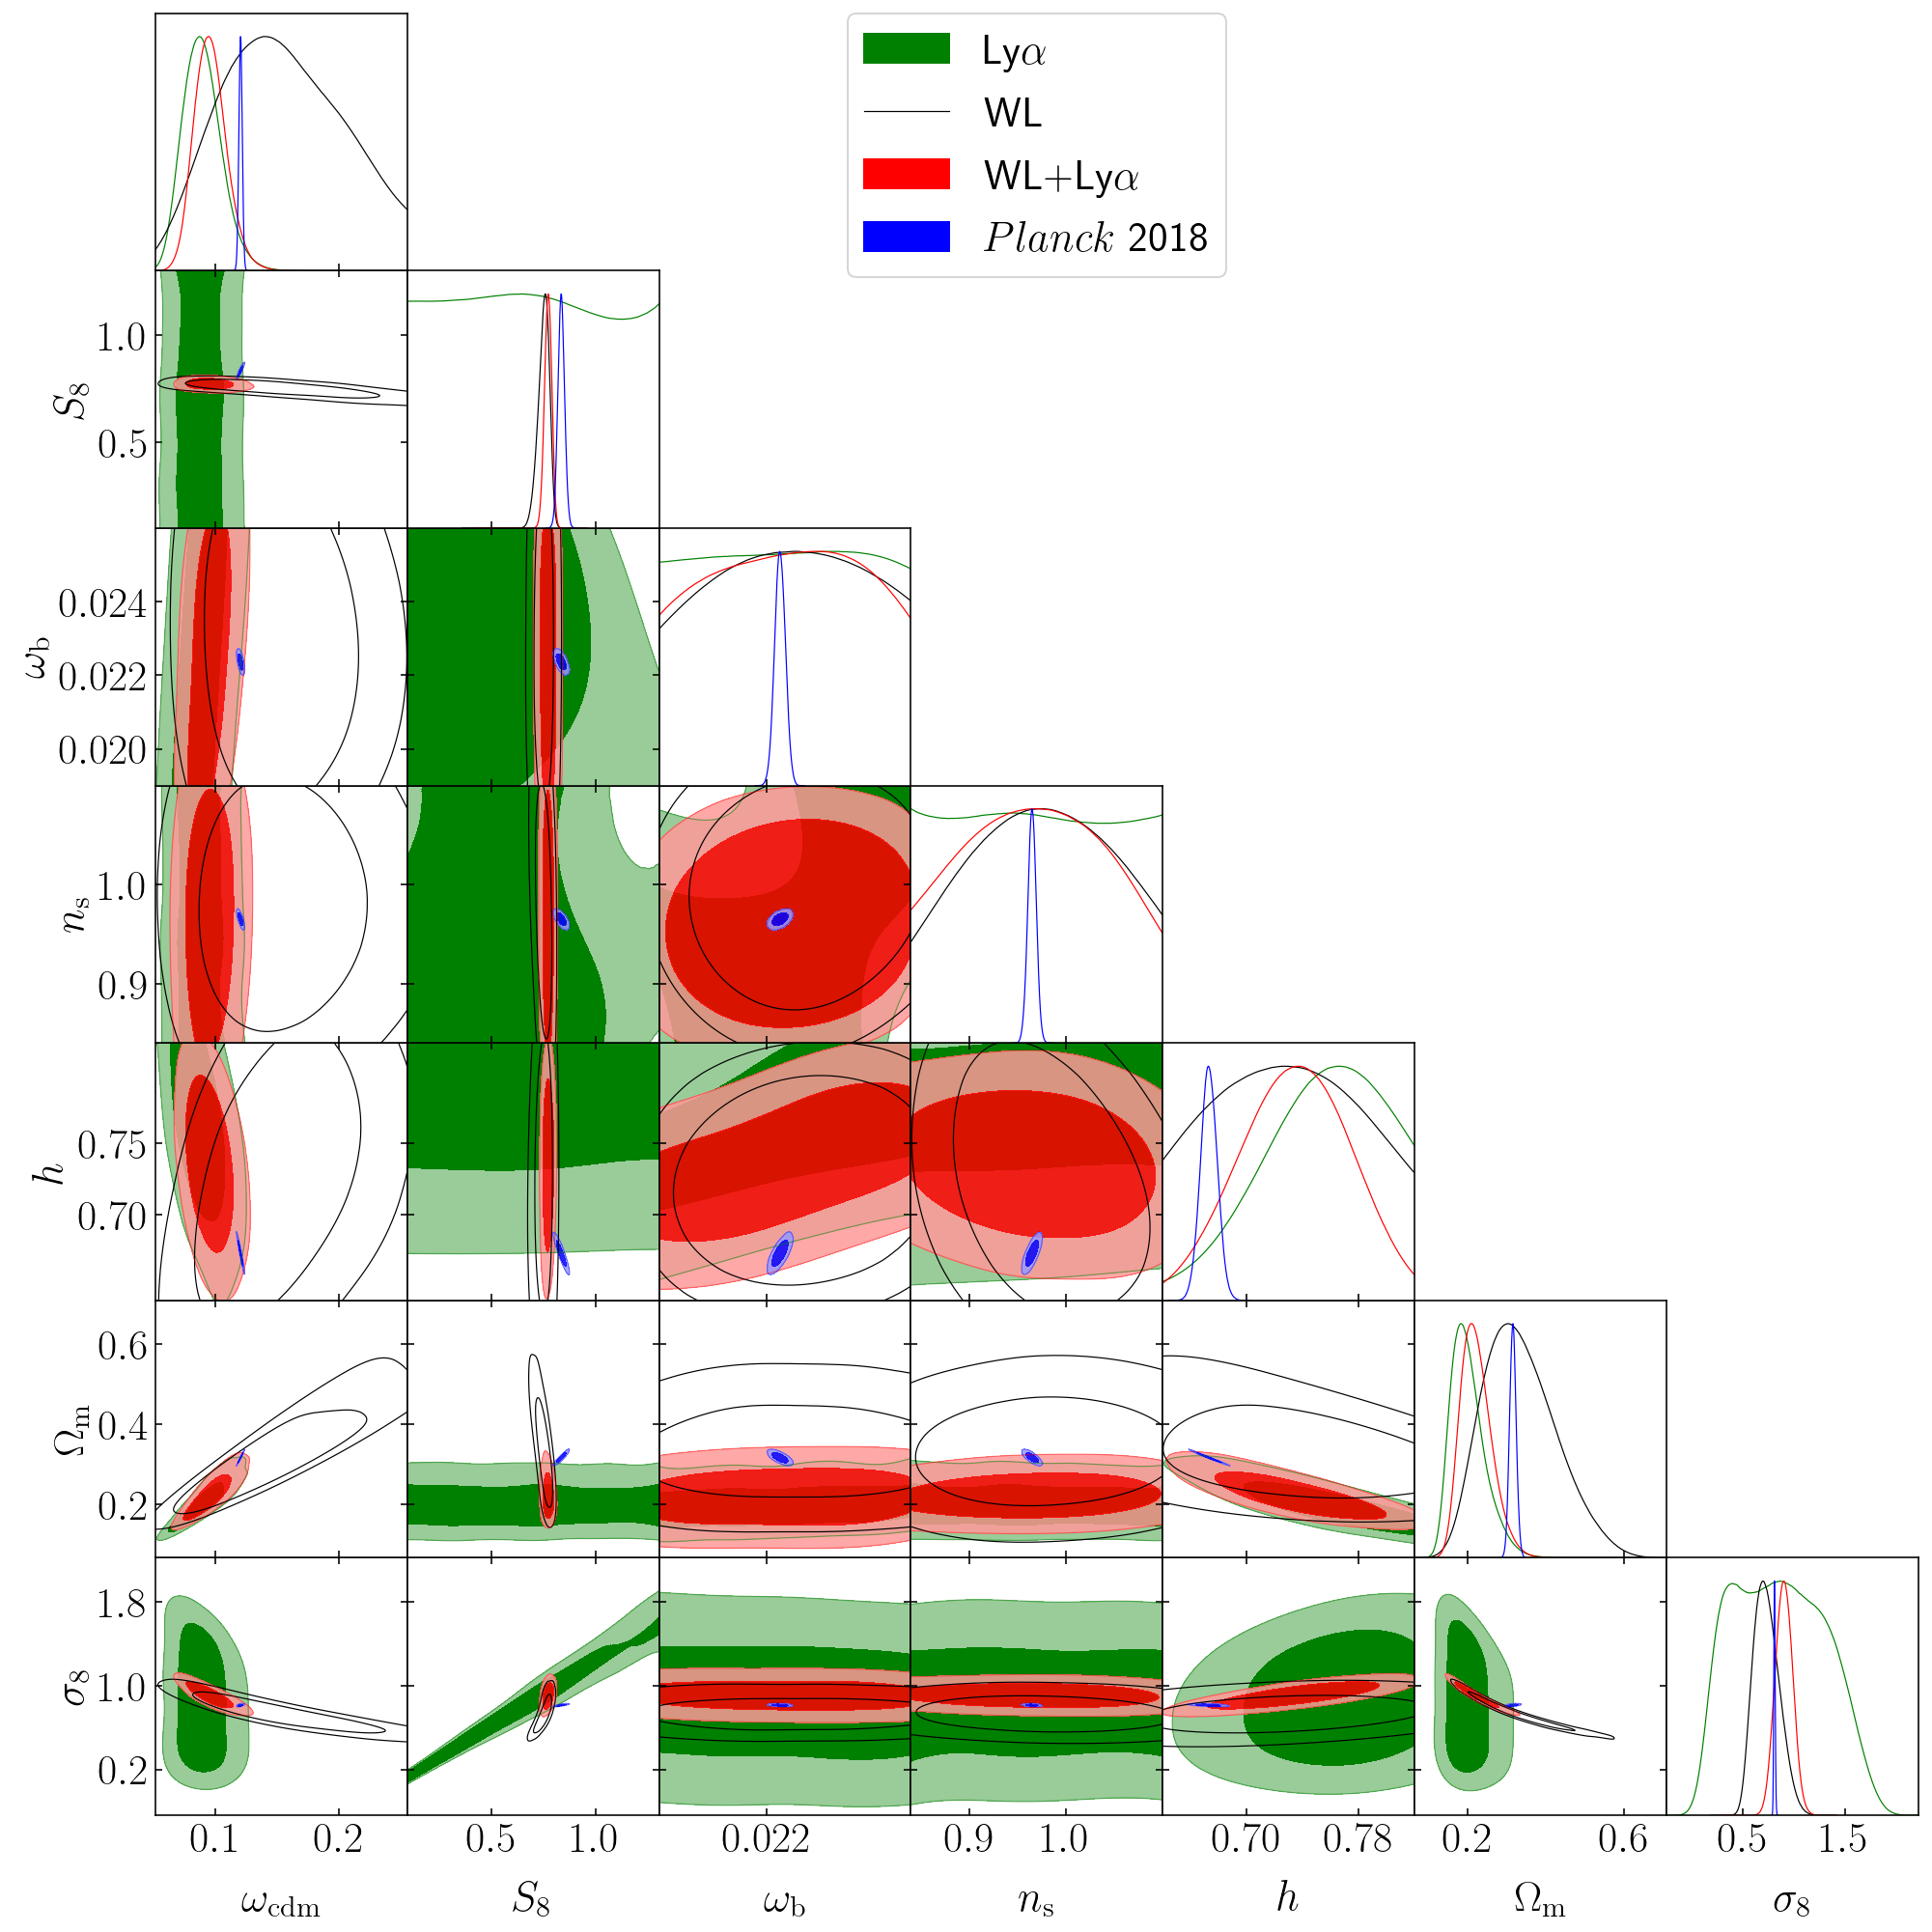

In [187]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot(plot[name], colors=['green', 'black', 'red','blue'],
                contour_colors=['green', 'black', 'red','blue'],
                filled=[True, False, True, True])
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/{}_triangle.pdf'.format(name))

In [111]:
def munch_CMB_test(path):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.array([cols[11], cols[5], cols[10]])
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=[ 'ln10^{10}A_s', 'ns', '100theta_s'], 
                        labels=['ln10^{10}A_s', 'ns',  '100theta_star'],
                        label = 'CMB',
                        weights=weights, loglikes=loglikes)
    return samples

def munch_planck_test():
    chain = planck_tot
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.array([cols[6], cols[7],  cols[56]]) #4
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=[ 'ln10^{10}A_s', 'ns', '100theta_s'], 
                        labels=[ 'ln10^{10}A_s', 'ns', '100theta_star'],
                        label = 'Planck',
                        weights=weights, loglikes=loglikes)
    return samples